In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import collections
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib inline

In [8]:
print('Loading data...')
df = pd.read_csv("./RH/data.csv")
print('Data is loaded')

Loading data...
Data is loaded


In [10]:
print("Summary of the basic information about this DataFrame and its data:")
print(df.info())

Summary of the basic information about this DataFrame and its data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 18 columns):
Quarter                            20 non-null object
SSE                                20 non-null float64
DJI                                20 non-null float64
SSE_DJI_Correlation_Coefficient    20 non-null float64
IE_Volume                          20 non-null float64
IE_Growth_Rate                     20 non-null float64
US_GDP                             20 non-null float64
US_GDP_Growth_Rate                 20 non-null float64
CN_GDP                             20 non-null float64
CN_GDP_Growth_Rate                 20 non-null float64
GPD_Diff                           20 non-null float64
US_CPI                             20 non-null float64
US_CPI_Growth_Rate                 20 non-null float64
CN_CPI                             20 non-null float64
CN_CPI_Growth_Rate                 20 non-null float64
CPI_D

In [11]:
df

,Quarter,SSE,DJI,SSE_DJI_Correlation_Coefficient,IE_Volume,IE_Growth_Rate,US_GDP,US_GDP_Growth_Rate,CN_GDP,CN_GDP_Growth_Rate,GPD_Diff,US_CPI,US_CPI_Growth_Rate,CN_CPI,CN_CPI_Growth_Rate,CPI_Diff,Exchange_Rate,Exchange_Volatility
0,14Q1,2051.309,16189.343,-0.093,4087904.404,0.000,4196.206,-3.246,14027.02,-16.393,13.146,323.308,0.761,306.9,-0.583,1.344,6.134,0.052
1,14Q2,2048.557,16592.367,-0.498,4460502.554,0.091,4356.246,3.814,15592.23,11.159,7.345,327.125,1.181,306.6,-0.098,1.279,6.235,0.301
2,14Q3,2205.846,16954.696,0.140,4939717.892,0.107,4444.486,2.026,16489.78,5.756,3.731,327.501,0.115,305.9,-0.228,0.343,6.137,0.034
3,14Q4,2619.172,17361.904,0.666,5023032.239,0.017,4524.792,1.807,18019.03,9.274,7.467,324.870,-0.803,304.5,-0.458,0.346,6.127,0.042
4,15Q1,3327.362,17807.473,0.132,4208619.020,-0.162,4387.125,-3.043,15059.38,-16.425,13.383,323.105,-0.543,303.6,-0.296,0.248,6.237,0.021
5,15Q2,4463.090,18008.386,0.104,4683804.988,0.113,4564.318,4.039,16787.45,11.475,7.436,327.000,1.206,304.1,0.165,1.041,6.204,0.012
6,15Q3,3536.720,17088.449,0.911,4908677.314,0.048,4608.954,0.978,17580.38,4.723,3.745,327.859,0.263,305.2,0.362,0.099,6.306,0.150
7,15Q4,3457.423,17456.115,0.716,4863102.036,-0.009,4658.900,1.084,19172.08,9.054,7.970,326.384,-0.450,304.4,-0.262,0.188,6.391,0.066
8,16Q1,2910.782,16668.396,0.442,3099162.501,-0.363,4494.170,-3.536,16096.73,-16.041,12.505,326.595,0.065,306.4,0.657,0.592,6.451,0.884
9,16Q2,2921.638,17751.558,0.294,4174271.679,0.347,4670.202,3.917,17987.87,11.749,7.832,330.424,1.172,306.2,-0.065,1.238,6.535,0.534


In [12]:
df.columns

Index(['Quarter', 'SSE', 'DJI', 'SSE_DJI_Correlation_Coefficient', 'IE_Volume',
       'IE_Growth_Rate', 'US_GDP', 'US_GDP_Growth_Rate', 'CN_GDP',
       'CN_GDP_Growth_Rate', 'GPD_Diff', 'US_CPI', 'US_CPI_Growth_Rate',
       'CN_CPI', 'CN_CPI_Growth_Rate', 'CPI_Diff', 'Exchange_Rate',
       'Exchange_Volatility'],
      dtype='object')

# 中美股票季度相关系数

In [28]:
# 14Q1 - 17Q2 v.s. 17Q3 - 18Q4
df1 = df.iloc[:14]  # 14Q1 - 17Q2
df2 = df.iloc[14:]  # 17Q3 - 18Q4

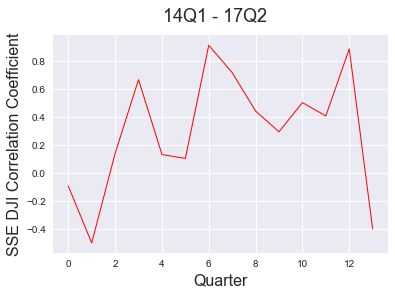

In [99]:
fig = plt.figure()
plt.plot(df1.loc[:,['SSE_DJI_Correlation_Coefficient']], 'r', linewidth=1) 
fig.suptitle('14Q1 - 17Q2', fontsize=18)
plt.xlabel('Quarter', fontsize=16)
plt.ylabel('SSE DJI Correlation Coefficient', fontsize=16)

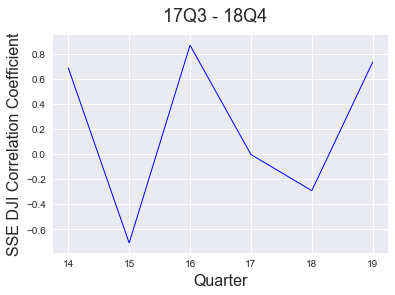

In [100]:
fig = plt.figure()
plt.plot(df2.loc[:,['SSE_DJI_Correlation_Coefficient']], 'b', linewidth=1) 
fig.suptitle('17Q3 - 18Q4', fontsize=18)
plt.xlabel('Quarter', fontsize=16)
plt.ylabel('SSE DJI Correlation Coefficient', fontsize=16)

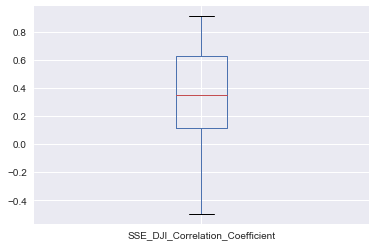

In [104]:
# 14Q1 - 17Q2 
df1.loc[:,['SSE_DJI_Correlation_Coefficient']].plot.box()

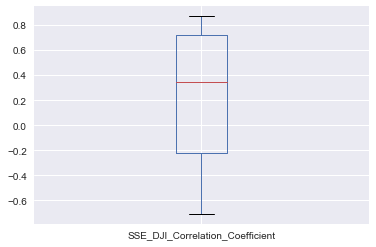

In [105]:
# 17Q3 - 18Q4
df2.loc[:,['SSE_DJI_Correlation_Coefficient']].plot.box()

##  16Q1 - 17Q2 v.s. 17Q3 - 18Q4

([<matplotlib.axis.XTick at 0x124a96c18>,
 <a list of 2 Text xticklabel objects>)

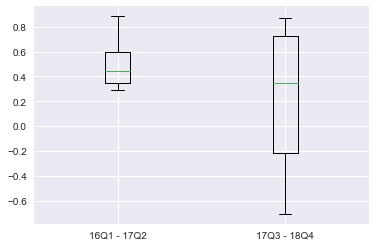

In [86]:
# 16Q1 - 17Q2 v.s. 17Q3 - 18Q4
data = [df.loc[8:14,['SSE_DJI_Correlation_Coefficient']], df.loc[14:20,['SSE_DJI_Correlation_Coefficient']]]
# fig, ax = plt.subplots(figsize=(10,5))
plt.boxplot (data)
plt.xticks([1, 2], ['16Q1 - 17Q2', '17Q3 - 18Q4'])

# 中美股票相关性影响因素分析

In [18]:
def correlation_analysis(df, target, source, Title ='feature correlations'):
    """
    generate correlation heatmap
    : type df: DataFram
    : type target: list # column name
    : type source: list # column name
    """
    matrix_hold = []
    for i in source:
        hold = []
        for j in target:
            hold.append(df[i].corr(df[j]))
        matrix_hold.append(hold)
    correlation_matrix = np.asarray(matrix_hold)
    sns.heatmap(correlation_matrix, xticklabels=target, yticklabels=source)
    plt.title(Title)
    return correlation_matrix

''

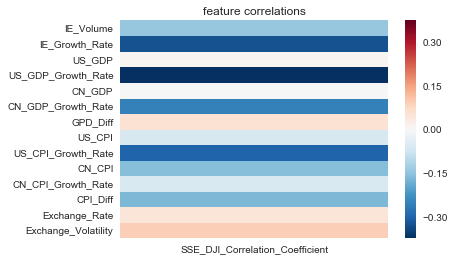

In [14]:
target = ['SSE_DJI_Correlation_Coefficient']
source = ['IE_Volume',
       'IE_Growth_Rate', 'US_GDP', 'US_GDP_Growth_Rate', 'CN_GDP',
       'CN_GDP_Growth_Rate', 'GPD_Diff', 'US_CPI', 'US_CPI_Growth_Rate',
       'CN_CPI', 'CN_CPI_Growth_Rate', 'CPI_Diff', 'Exchange_Rate',
       'Exchange_Volatility']
other_columns_correlation = correlation_analysis(df, target, source)
"""
各指标与季度相关系数相关性分析图：
颜色越深，相关性越大

IE_Growth_Rate，US_GDP_Growth_Rate，CN_GDP_Growth_Rate，US_CPI_Growth_Rate，CN_CPI_Growth_Rate，Exchange_Volatility
对中美股票相关性影响较大
"""

'\n结论：\n美国GDP，CPI增长率对中美股票相关性的影响大于中国GDP，CPI增长率的影响\n'

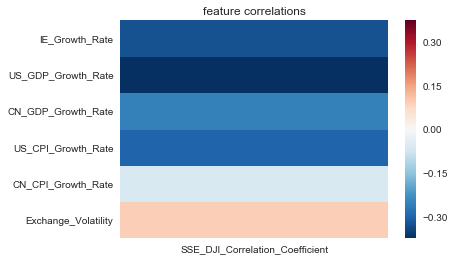

In [19]:
target = ['SSE_DJI_Correlation_Coefficient']
source = ['IE_Growth_Rate','US_GDP_Growth_Rate','CN_GDP_Growth_Rate','US_CPI_Growth_Rate', 'CN_CPI_Growth_Rate','Exchange_Volatility']
other_columns_correlation = correlation_analysis(df, target, source)
"""
结论：
美国GDP，CPI增长率对中美股票相关性的影响大于中国GDP，CPI增长率的影响
"""

In [22]:
# 研究17/08/14前后， 各影响因子的影响分析
# 14Q1 - 17Q2 v.s. 17Q3 - 18Q4
df1 = df.iloc[:14]  # 14Q1 - 17Q2
df2 = df.iloc[14:]  # 17Q3 - 18Q4

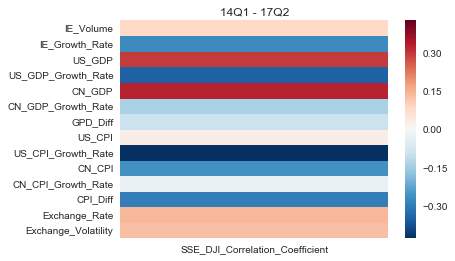

In [26]:
target = ['SSE_DJI_Correlation_Coefficient']
source = ['IE_Volume',
       'IE_Growth_Rate', 'US_GDP', 'US_GDP_Growth_Rate', 'CN_GDP',
       'CN_GDP_Growth_Rate', 'GPD_Diff', 'US_CPI', 'US_CPI_Growth_Rate',
       'CN_CPI', 'CN_CPI_Growth_Rate', 'CPI_Diff', 'Exchange_Rate',
       'Exchange_Volatility']
other_columns_correlation = correlation_analysis(df1, target, source,'14Q1 - 17Q2')

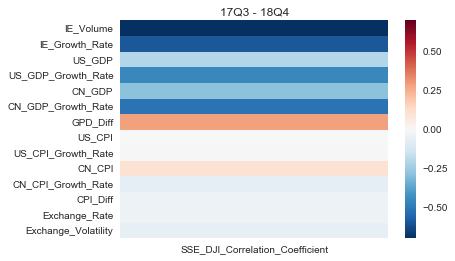

In [27]:
target = ['SSE_DJI_Correlation_Coefficient']
source = ['IE_Volume',
       'IE_Growth_Rate', 'US_GDP', 'US_GDP_Growth_Rate', 'CN_GDP',
       'CN_GDP_Growth_Rate', 'GPD_Diff', 'US_CPI', 'US_CPI_Growth_Rate',
       'CN_CPI', 'CN_CPI_Growth_Rate', 'CPI_Diff', 'Exchange_Rate',
       'Exchange_Volatility']
other_columns_correlation = correlation_analysis(df2, target, source,'17Q3 - 18Q4')